In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from hyppo.ksample import KSample
from scipy.stats import ttest_ind, mannwhitneyu, ks_2samp

In [5]:
res_df = pd.read_csv("../../results/edge_simulation_changing_means.csv")
res_df.head()

,m,mean1,mean2,var_1,var_2,ttest_ind_precision_at_10,wilcoxon_precision_at_10,mannwhitneyu_precision_at_10,ks_2samp_precision_at_10,ttest_ind_recall_at_10,wilcoxon_recall_at_10,mannwhitneyu_recall_at_10,ks_2samp_recall_at_10
0,5,0,0.00,0.5,0.5,0.067,0.056,0.066,0.065,0.067,0.056,0.066,0.065
1,5,0,0.01,0.5,0.5,0.035,0.051,0.038,0.041,0.035,0.051,0.038,0.041
2,5,0,0.02,0.5,0.5,0.068,0.056,0.065,0.054,0.068,0.056,0.065,0.054
3,5,0,0.03,0.5,0.5,0.054,0.051,0.048,0.049,0.054,0.051,0.048,0.049
4,5,0,0.04,0.5,0.5,0.060,0.058,0.063,0.053,0.060,0.058,0.063,0.053


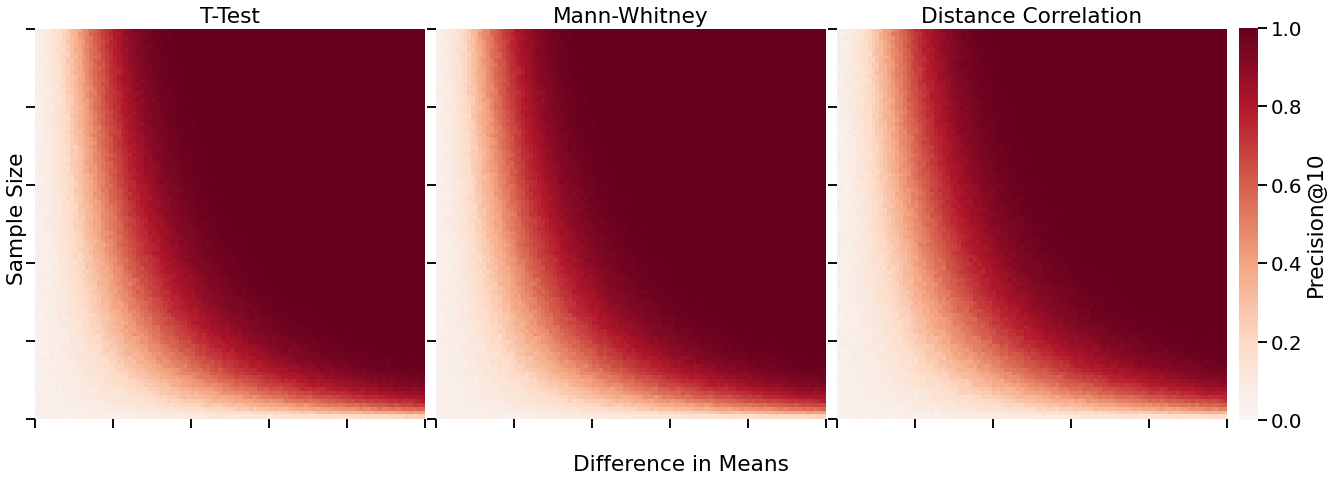

In [6]:
sns.set_context("talk", font_scale=1.2)
fig, ax = plt.subplots(
    ncols=4,
    gridspec_kw={"width_ratios": [1, 1, 1, 0.05]},
    figsize=(18, 6),
    # sharex=True,
    # sharey=True
    constrained_layout=True,
)

# Plotting
res_df = res_df[res_df.mean2 != 0]

tests = [ttest_ind, mannwhitneyu, ks_2samp]
names = dict(
    ttest_ind="T-Test",
    wilcoxon="Wilcoxon",
    mannwhitneyu="Mann-Whitney",
    # test="Distance Correlation",
    ks_2samp="Distance Correlation",
)

fmt = lambda x: "{:.1f}".format(x)

p = 0.5
spacing = 100
deltas = np.linspace(0, 1, spacing + 1)[::20]
deltas[0] += 0.01
ms = np.linspace(0, 500, spacing + 1)[::20] * 2
ms[0] += 20


for i, test in enumerate(tests):
    sns.heatmap(
        np.flipud(
            res_df[f"{test.__name__}_precision_at_10"].values.reshape(spacing, -1)
        ),
        ax=ax[i],
        square=True,
        center=0,
        cmap="RdBu_r",
        cbar_kws=dict(shrink=0.7),
        xticklabels=[fmt(d) for d in deltas],
        yticklabels=["{:.0f}".format(m) for m in ms],
        cbar_ax=ax[-1],
        vmin=0,
        vmax=1,
    )
    ax[i].set_xticks(np.arange(0, ax[0].get_xlim()[1] + 1, 20))
    ax[i].set_yticks(np.arange(0, ax[0].get_ylim()[0] + 1, 20)[::-1])
    if i != 0:
        ax[i].yaxis.set_major_formatter(plt.NullFormatter())
    ax[i].set_title(f"{names[test.__name__]}")

# fig.text(0.5, 1.06, "Precision@10", va='center', ha='center')
fig.text(-0.02, 0.5, "Sample Size", va="center", rotation="vertical")
fig.text(0.5, -0.07, "Difference in Means", va="center", ha="center")
ax[-1].set_ylabel("Precision@10")
plt.show()

In [7]:
res_df = pd.read_csv("../../results/edge_simulation_changing_variance.csv")
res_df.head()

,m,mean1,mean2,var_1,var_2,ttest_ind_precision_at_5,ttest_ind_precision_at_6,ttest_ind_precision_at_7,ttest_ind_precision_at_8,ttest_ind_precision_at_9,...,mannwhitneyu_recall_at_7,mannwhitneyu_recall_at_8,mannwhitneyu_recall_at_9,mannwhitneyu_recall_at_10,test_recall_at_5,test_recall_at_6,test_recall_at_7,test_recall_at_8,test_recall_at_9,test_recall_at_10
0,10,0,0,0.25,0.31,0.0,0.000000,0.000000,0.000,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,0,0,0.25,0.37,0.2,0.166667,0.142857,0.125,0.111111,...,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2
2,10,0,0,0.25,0.43,0.0,0.000000,0.000000,0.125,0.111111,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,10,0,0,0.25,0.49,0.0,0.000000,0.000000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1
4,10,0,0,0.25,0.55,0.2,0.166667,0.142857,0.125,0.111111,...,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1


Text(1296.99976, 0.5, 'Precision@10')

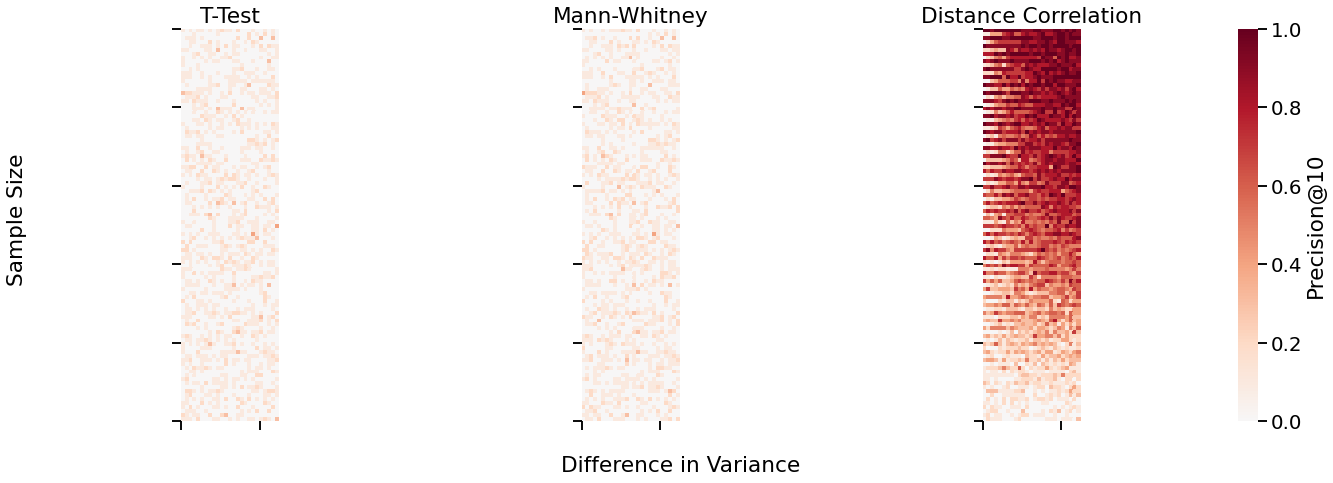

In [8]:
sns.set_context("talk", font_scale=1.2)
fig, ax = plt.subplots(
    ncols=4,
    gridspec_kw={"width_ratios": [1, 1, 1, 0.05]},
    figsize=(18, 6),
    # sharex=True,
    # sharey=True
    constrained_layout=True,
)

# Plotting
res_df = res_df[res_df.var_2 != 0.25]

tests = [ttest_ind, mannwhitneyu, KSample("Dcorr").test]
names = dict(
    ttest_ind="T-Test",
    wilcoxon="Wilcoxon",
    mannwhitneyu="Mann-Whitney",
    test="Distance Correlation",
    ks_2samp="Distance Correlation",
)

fmt = lambda x: "{:.1f}".format(x)

p = 0.5
spacing = 100
# deltas = np.linspace(0, 1, spacing + 1)[::20]
deltas = np.linspace(0, 3, spacing + 1)[::20]
deltas[0] += 0.01
ms = np.linspace(0, 500, spacing + 1)[::20] * 2
ms[0] += 20

for i, test in enumerate(tests):
    sns.heatmap(
        np.flipud(
            res_df[f"{test.__name__}_precision_at_10"].values.reshape(spacing, -1)
        ),
        ax=ax[i],
        square=True,
        center=0,
        cmap="RdBu_r",
        cbar_kws=dict(shrink=0.7),
        xticklabels=[fmt(d) for d in deltas],
        yticklabels=["{:.0f}".format(m) for m in ms],
        cbar_ax=ax[-1],
        vmin=0,
        vmax=1,
    )
    ax[i].set_xticks(np.arange(0, ax[0].get_xlim()[1] + 1, 20))
    ax[i].set_yticks(np.arange(0, ax[0].get_ylim()[0] + 1, 20)[::-1])
    if i != 0:
        ax[i].yaxis.set_major_formatter(plt.NullFormatter())
    ax[i].set_title(f"{names[test.__name__]}")

# fig.text(0.5, 1.06, "Precision@10", va='center', ha='center')
fig.text(-0.02, 0.5, "Sample Size", va="center", rotation="vertical")
fig.text(0.5, -0.07, "Difference in Variance", va="center", ha="center")
ax[-1].set_ylabel("Precision@10")